In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [3]:
fraud=pd.read_csv("Fraud_check.csv")

In [4]:
fraud.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


<AxesSubplot:>

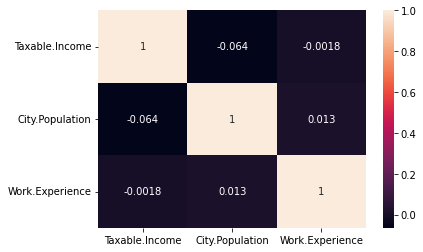

In [8]:
sns.heatmap(fraud.corr(), annot=True)

In [9]:
fraud["Undergrad"].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [10]:
fraud["Urban"].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [14]:
fraud.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [11]:
risk=lambda x: "Risky" if x<= 30000 else "Good"

In [15]:
fraud["Category"]=fraud['Taxable.Income'].apply(risk)

In [16]:
fraud.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good


In [19]:
fraud["Marital.Status"].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [20]:
# changed yes as 1 and NO as 0
fraud.replace({"YES":0,"NO":0}, inplace=True)

In [23]:
fraud.replace({"Risky":0,"Good":1}, inplace=True)

In [25]:
fraud_new=pd.get_dummies(fraud, columns=["Marital.Status"])

In [26]:
fraud_new

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Category,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,0,1,0,0,1
1,0,33700,134075,18,0,1,1,0,0
2,0,36925,160205,30,0,1,0,1,0
3,0,50190,193264,15,0,1,0,0,1
4,0,81002,27533,28,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,0,76340,39492,7,0,1,1,0,0
596,0,69967,55369,2,0,1,1,0,0
597,0,47334,154058,0,0,1,1,0,0
598,0,98592,180083,17,0,1,0,1,0
